In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

pd.set_option('display.max_columns', None)

In [10]:
df_1 = pd.read_csv("/kaggle/input/hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv", sep=';', encoding="cp1251")

/tmp/ipykernel_452/1756704826.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("/kaggle/input/hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv", sep=';', encoding="cp1251")


In [11]:
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,brth_plc,addrss_type,rgn,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,"1,ГОР. НОВОСИБИРСК",Адрес места жительства,ОМСКАЯ ОБЛ,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,"1,Г.БЕЛОГОРСК АМУРСКОЙ ОБЛ",Адрес места жительства,АМУРСКАЯ ОБЛ,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,"1,,,МОСКВА,",Адрес места жительства,МОСКВА Г,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,"1,Д. ДОБРОМЫШ АЛЬМЕТЬЕВСКОГО Р-НА ТАТАРСКОЙ АССР",Адрес места жительства,ТАТАРСТАН РЕСП,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,УДМУРТСКАЯ АССР ИГРИНСКИЙ СВЕТЛЯНА,Адрес по прописке,УДМУРТСКАЯ РЕСП,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет


In [12]:
df_1["gndr"] = df_1["gndr"].replace({"ж":1, "м": 0})

In [13]:
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,brth_plc,addrss_type,rgn,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,1,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,"1,ГОР. НОВОСИБИРСК",Адрес места жительства,ОМСКАЯ ОБЛ,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,0,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,"1,Г.БЕЛОГОРСК АМУРСКОЙ ОБЛ",Адрес места жительства,АМУРСКАЯ ОБЛ,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,0,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,"1,,,МОСКВА,",Адрес места жительства,МОСКВА Г,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,1,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,"1,Д. ДОБРОМЫШ АЛЬМЕТЬЕВСКОГО Р-НА ТАТАРСКОЙ АССР",Адрес места жительства,ТАТАРСТАН РЕСП,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,0,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,УДМУРТСКАЯ АССР ИГРИНСКИЙ СВЕТЛЯНА,Адрес по прописке,УДМУРТСКАЯ РЕСП,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет


In [14]:
df_1= df_1.replace({"да":1,"нет":0})

In [15]:
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,brth_plc,addrss_type,rgn,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,1,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,"1,ГОР. НОВОСИБИРСК",Адрес места жительства,ОМСКАЯ ОБЛ,NaN,ОМСК Г,NaN,644001,5.200000e+10,0,0,0,0,0
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,0,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,"1,Г.БЕЛОГОРСК АМУРСКОЙ ОБЛ",Адрес места жительства,АМУРСКАЯ ОБЛ,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,0,0,0,0,0
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,0,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,"1,,,МОСКВА,",Адрес места жительства,МОСКВА Г,NaN,NaN,NaN,109451,4.500000e+10,0,0,0,0,0
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,1,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,"1,Д. ДОБРОМЫШ АЛЬМЕТЬЕВСКОГО Р-НА ТАТАРСКОЙ АССР",Адрес места жительства,ТАТАРСТАН РЕСП,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,0,0,0,0,0
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,0,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,УДМУРТСКАЯ АССР ИГРИНСКИЙ СВЕТЛЯНА,Адрес по прописке,УДМУРТСКАЯ РЕСП,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,0,0,0,0,0


In [16]:
df_1.dropna(inplace=True)

In [17]:
df_1.drop(columns=["sttlmnt", "city", "dstrct", "prvs_npf"],inplace=True)

In [18]:
df_1.drop(columns=["brth_plc","pstl_code","okato"],inplace=True)

In [19]:
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops
21,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0
144,1,0x484901E10C23F347AF1392BB350CC4E1,0x7B800DEB84874646AE020A4126A5FEA3,1,1959,65,2012-04-17,343,0,Накопительный период,55,Адрес по прописке,КРАСНОДАРСКИЙ КРАЙ,0,0,1,0,0
345,0,0xEE3834465D31714CA2D334994C181554,0x0C798591D9D15A4BA5FC7B1C761F074C,0,1959,65,2007-12-17,102,0,Накопительный период,60,Адрес места жительства,КИРОВСКАЯ ОБЛ,0,0,0,0,0
374,0,0x7E130DF135B53B4FA0C6CDAEF9E5ACE4,0x2B27ABA473926F408F0E4EAB34D1B5D8,1,1961,63,2005-09-02,206,0,Накопительный период,55,Адрес места жительства,МОСКОВСКАЯ ОБЛ,0,0,0,0,0
393,3,0x943D2C768A4FB38311E6626D5D2BA0CD,0x943D2C768A4FB38311E6626D5D2BA0CF,1,1967,57,2013-03-29,3773,1,Выплатной период,59,Адрес места жительства,МОСКОВСКАЯ ОБЛ,0,0,0,0,0


In [20]:
df_1['age_group'] = (df_1['prsnt_age'] // 5) * 5

In [21]:
df_1['age_group'].value_counts()

age_group
65    1318
60    1271
55     427
70     161
50      43
75       5
45       3
Name: count, dtype: int64

In [22]:
region_code={
    "ОМСКАЯ ОБЛ": 1,
    "АМУРСКАЯ ОБЛ": 1,
    "МОСКВА Г": 1,
    "ТАТАРСТАН РЕСП": 1,
    "УДМУРТСКАЯ РЕСП": 1,
    "СВЕРДЛОВСКАЯ ОБЛ": 1,
    "ТОМСКАЯ ОБЛ": 1,
    "НОВОСИБИРСКАЯ ОБЛ": 1,
    "БАШКОРТОСТАН РЕСП": 1,
    "БУРЯТИЯ РЕСП": 1,
    "САМАРСКАЯ ОБЛ": 1,
    "КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ": 42,
    "ВОЛОГОДСКАЯ ОБЛ": 1,
    "ВОЛГОГРАДСКАЯ ОБЛ": 1,
    "КРАСНОЯРСКИЙ КРАЙ": 1,
    "ЗАБАЙКАЛЬСКИЙ КРАЙ": 1,
    "ЧЕЛЯБИНСКАЯ ОБЛ": 1,
    "СТАВРОПОЛЬСКИЙ КРАЙ": 1,
    "ДАГЕСТАН РЕСП": 1,
    "ЛИПЕЦКАЯ ОБЛ": 1,
    "ЯРОСЛАВСКАЯ ОБЛ": 1,
    "САНКТ-ПЕТЕРБУРГ Г": 1,
    "КУРГАНСКАЯ ОБЛ": 1,
    "МУРМАНСКАЯ ОБЛ": 1,
    "ПРИМОРСКИЙ КРАЙ": 1,
    "САХА /ЯКУТИЯ/ РЕСП": 1,
    "ИРКУТСКАЯ ОБЛ": 1,
    "САРАТОВСКАЯ ОБЛ": 1,
    "": 1,
    "": 1,
    "": 1,
    "": 1,
    "": 1,
    "": 1,
}

In [23]:
client_dummies = pd.get_dummies(df_1, columns=['gndr', 'accnt_status', 'addrss_type'])
label_encoder = LabelEncoder()
client_dummies['rgn'] = label_encoder.fit_transform(client_dummies['rgn'])

In [24]:
client_dummies.head()

,slctn_nmbr,clnt_id,accnt_id,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,pnsn_age,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,gndr_0,gndr_1,accnt_status_Выплатной период,accnt_status_Накопительный период,addrss_type_Адрес места жительства,addrss_type_Адрес по прописке
21,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,1958,66,2012-04-30,330,0,60,76,0,0,1,0,0,65,True,False,False,True,False,True
144,1,0x484901E10C23F347AF1392BB350CC4E1,0x7B800DEB84874646AE020A4126A5FEA3,1959,65,2012-04-17,343,0,55,30,0,0,1,0,0,65,False,True,False,True,False,True
345,0,0xEE3834465D31714CA2D334994C181554,0x0C798591D9D15A4BA5FC7B1C761F074C,1959,65,2007-12-17,102,0,60,27,0,0,0,0,0,65,True,False,False,True,True,False
374,0,0x7E130DF135B53B4FA0C6CDAEF9E5ACE4,0x2B27ABA473926F408F0E4EAB34D1B5D8,1961,63,2005-09-02,206,0,55,40,0,0,0,0,0,60,False,True,False,True,True,False
393,3,0x943D2C768A4FB38311E6626D5D2BA0CD,0x943D2C768A4FB38311E6626D5D2BA0CF,1967,57,2013-03-29,3773,1,59,40,0,0,0,0,0,55,False,True,True,False,True,False


In [25]:
client_dummies.replace({True: 1, False: 0}, inplace=True)

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3228 entries, 21 to 532794
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   slctn_nmbr      3228 non-null   int64 
 1   clnt_id         3228 non-null   object
 2   accnt_id        3228 non-null   object
 3   gndr            3228 non-null   int64 
 4   brth_yr         3228 non-null   int64 
 5   prsnt_age       3228 non-null   int64 
 6   accnt_bgn_date  3228 non-null   object
 7   cprtn_prd_d     3228 non-null   int64 
 8   erly_pnsn_flg   3228 non-null   int64 
 9   accnt_status    3228 non-null   object
 10  pnsn_age        3228 non-null   int64 
 11  addrss_type     3228 non-null   object
 12  rgn             3228 non-null   object
 13  phn             3228 non-null   int64 
 14  email           3228 non-null   int64 
 15  lk              3228 non-null   int64 
 16  assgn_npo       3228 non-null   int64 
 17  assgn_ops       3228 non-null   int64 
 18  age_group 

In [27]:
df_1["rgn"].unique()

array(['ЧЕЛЯБИНСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ', 'КИРОВСКАЯ ОБЛ',
       'МОСКОВСКАЯ ОБЛ', 'АМУРСКАЯ ОБЛ', 'ПРИМОРСКИЙ КРАЙ',
       'АРХАНГЕЛЬСКАЯ ОБЛ', 'КОМИ РЕСП', 'ИРКУТСКАЯ ОБЛ',
       'ЯРОСЛАВСКАЯ ОБЛ', 'МОРДОВИЯ РЕСП', 'ЛЕНИНГРАДСКАЯ ОБЛ',
       'СТАВРОПОЛЬСКИЙ КРАЙ', 'САМАРСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО', 'РОСТОВСКАЯ ОБЛ',
       'АСТРАХАНСКАЯ ОБЛ', 'САРАТОВСКАЯ ОБЛ', 'ХАБАРОВСКИЙ КРАЙ',
       'ПЕРМСКИЙ КРАЙ', 'НОВОСИБИРСКАЯ ОБЛ', 'БУРЯТИЯ РЕСП',
       'КАРЕЛИЯ РЕСП', 'ТУЛЬСКАЯ ОБЛ', 'СМОЛЕНСКАЯ ОБЛ',
       'ВОРОНЕЖСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'БАШКОРТОСТАН РЕСП',
       'АЛТАЙСКИЙ КРАЙ', 'ПСКОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ВОЛГОГРАДСКАЯ ОБЛ', 'ТАТАРСТАН РЕСП',
       'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
       'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ', 'КРАСНОЯРСКИЙ КРАЙ',
       'НИЖЕГОРОДСКАЯ ОБЛ', 'ВЛАДИМИРСКАЯ ОБЛ', 'ОРЕНБУРГСКАЯ ОБЛ',
       'КОСТРОМСКАЯ ОБЛ', 'ЗАБАЙКАЛЬСКИЙ КРАЙ', 'ДАГЕСТАН РЕСП',
       'САХАЛИНСКАЯ ОБЛ', 'ВОЛОГОДСКА

In [28]:
df_1.isna().sum(), df_1.isnull().sum(), df_1.duplicated().sum()

(slctn_nmbr        0
 clnt_id           0
 accnt_id          0
 gndr              0
 brth_yr           0
 prsnt_age         0
 accnt_bgn_date    0
 cprtn_prd_d       0
 erly_pnsn_flg     0
 accnt_status      0
 pnsn_age          0
 addrss_type       0
 rgn               0
 phn               0
 email             0
 lk                0
 assgn_npo         0
 assgn_ops         0
 age_group         0
 dtype: int64,
 slctn_nmbr        0
 clnt_id           0
 accnt_id          0
 gndr              0
 brth_yr           0
 prsnt_age         0
 accnt_bgn_date    0
 cprtn_prd_d       0
 erly_pnsn_flg     0
 accnt_status      0
 pnsn_age          0
 addrss_type       0
 rgn               0
 phn               0
 email             0
 lk                0
 assgn_npo         0
 assgn_ops         0
 age_group         0
 dtype: int64,
 0)

In [29]:
df_1.describe()

,slctn_nmbr,gndr,brth_yr,prsnt_age,cprtn_prd_d,erly_pnsn_flg,pnsn_age,phn,email,lk,assgn_npo,assgn_ops,age_group
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.0,3228.000000,3228.000000,3228.000000,3228.000000
mean,0.700743,0.581165,1960.261152,63.738848,461.101301,0.075898,57.603779,0.006506,0.0,0.315675,0.000620,0.008674,61.754957
std,1.009241,0.493445,3.883525,3.883525,926.566212,0.264876,2.678764,0.080407,0.0,0.464856,0.024887,0.092744,4.161415
min,0.000000,0.000000,1947.000000,48.000000,36.000000,0.000000,55.000000,0.000000,0.0,0.000000,0.000000,0.000000,45.000000
25%,0.000000,0.000000,1958.000000,61.000000,109.000000,0.000000,55.000000,0.000000,0.0,0.000000,0.000000,0.000000,60.000000
50%,0.000000,1.000000,1960.000000,64.000000,178.000000,0.000000,56.000000,0.000000,0.0,0.000000,0.000000,0.000000,60.000000
75%,1.000000,1.000000,1963.000000,66.000000,324.250000,0.000000,60.000000,0.000000,0.0,1.000000,0.000000,0.000000,65.000000
max,3.000000,1.000000,1976.000000,77.000000,6461.000000,1.000000,65.000000,1.000000,0.0,1.000000,1.000000,1.000000,75.000000


In [30]:
df_1["rgn"].unique()

array(['ЧЕЛЯБИНСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ', 'КИРОВСКАЯ ОБЛ',
       'МОСКОВСКАЯ ОБЛ', 'АМУРСКАЯ ОБЛ', 'ПРИМОРСКИЙ КРАЙ',
       'АРХАНГЕЛЬСКАЯ ОБЛ', 'КОМИ РЕСП', 'ИРКУТСКАЯ ОБЛ',
       'ЯРОСЛАВСКАЯ ОБЛ', 'МОРДОВИЯ РЕСП', 'ЛЕНИНГРАДСКАЯ ОБЛ',
       'СТАВРОПОЛЬСКИЙ КРАЙ', 'САМАРСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО', 'РОСТОВСКАЯ ОБЛ',
       'АСТРАХАНСКАЯ ОБЛ', 'САРАТОВСКАЯ ОБЛ', 'ХАБАРОВСКИЙ КРАЙ',
       'ПЕРМСКИЙ КРАЙ', 'НОВОСИБИРСКАЯ ОБЛ', 'БУРЯТИЯ РЕСП',
       'КАРЕЛИЯ РЕСП', 'ТУЛЬСКАЯ ОБЛ', 'СМОЛЕНСКАЯ ОБЛ',
       'ВОРОНЕЖСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'БАШКОРТОСТАН РЕСП',
       'АЛТАЙСКИЙ КРАЙ', 'ПСКОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ВОЛГОГРАДСКАЯ ОБЛ', 'ТАТАРСТАН РЕСП',
       'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
       'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ', 'КРАСНОЯРСКИЙ КРАЙ',
       'НИЖЕГОРОДСКАЯ ОБЛ', 'ВЛАДИМИРСКАЯ ОБЛ', 'ОРЕНБУРГСКАЯ ОБЛ',
       'КОСТРОМСКАЯ ОБЛ', 'ЗАБАЙКАЛЬСКИЙ КРАЙ', 'ДАГЕСТАН РЕСП',
       'САХАЛИНСКАЯ ОБЛ', 'ВОЛОГОДСКА

In [31]:
df_1["prvs_npf"].unique()

KeyError: 'prvs_npf'

<Figure size 819.2x614.4 with 0 Axes>

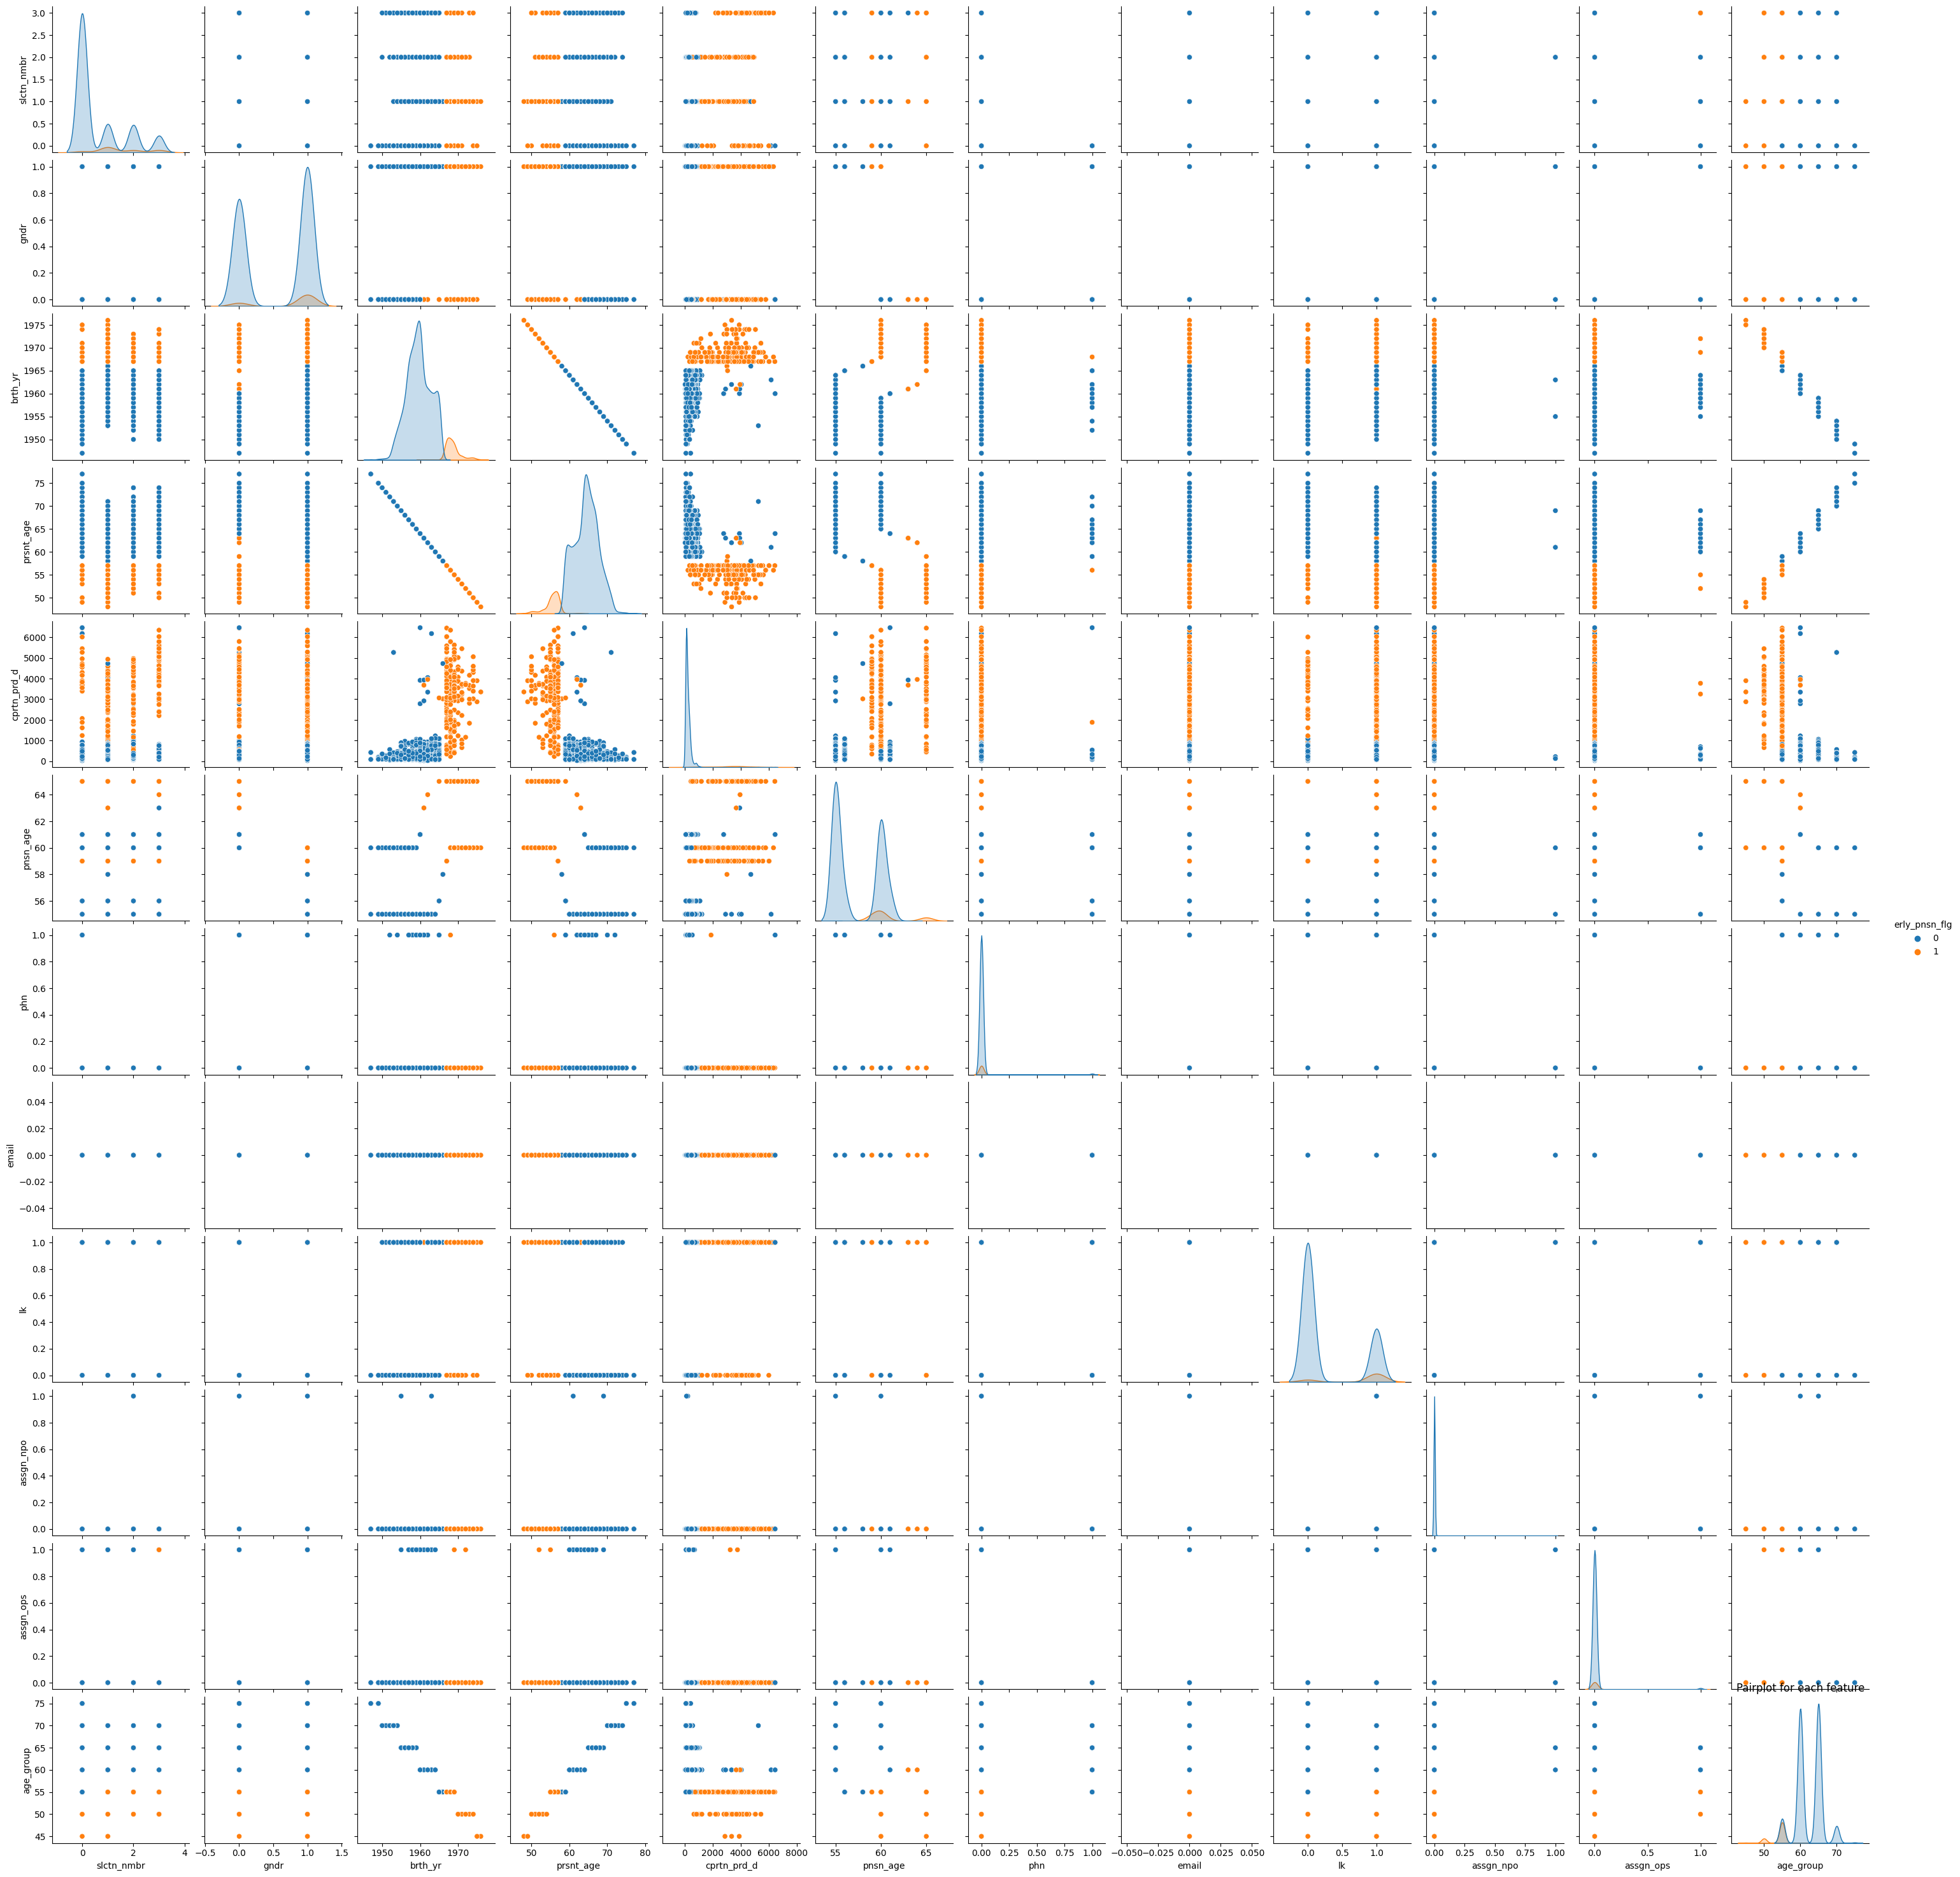

In [32]:
plt.figure(dpi=128)
sns.pairplot(df_1, hue='erly_pnsn_flg')
plt.title("Pairplot for each feature")
plt.show()

In [33]:
numeric_columns = list(df_1.describe().columns)

In [ ]:
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 4 * len(numeric_columns)), dpi=300)

for ind, col in enumerate(numeric_columns):
    
    plt.subplot(len(numeric_columns), 2, 2 * ind + 1)
    sns.histplot(df_1, x = col, bins = 40, kde = True);
    plt.gca().set_title(col)
        
    plt.subplot(len(numeric_columns), 2, 2 * ind + 2)
    sns.boxplot(df_1, x = col, orient="h", palette="flare")
    plt.gca().set_title(col)
    
fig.tight_layout()
plt.show()

In [34]:
df_2 = pd.read_csv("/kaggle/input/hack-pfo/train_data/trnsctns_ops_trn.csv", sep=';', encoding="cp1251")

In [35]:
df_1['accnt_bgn_date'] = pd.to_datetime(df_1['accnt_bgn_date'])
current_date = pd.to_datetime("today")

df_1['accnt_bgn_year'] = df_1['accnt_bgn_date'].dt.year
df_1['accnt_bgn_month'] = df_1['accnt_bgn_date'].dt.month
df_1['accnt_bgn_day'] = df_1['accnt_bgn_date'].dt.day
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day
21,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30
144,1,0x484901E10C23F347AF1392BB350CC4E1,0x7B800DEB84874646AE020A4126A5FEA3,1,1959,65,2012-04-17,343,0,Накопительный период,55,Адрес по прописке,КРАСНОДАРСКИЙ КРАЙ,0,0,1,0,0,65,2012,4,17
345,0,0xEE3834465D31714CA2D334994C181554,0x0C798591D9D15A4BA5FC7B1C761F074C,0,1959,65,2007-12-17,102,0,Накопительный период,60,Адрес места жительства,КИРОВСКАЯ ОБЛ,0,0,0,0,0,65,2007,12,17
374,0,0x7E130DF135B53B4FA0C6CDAEF9E5ACE4,0x2B27ABA473926F408F0E4EAB34D1B5D8,1,1961,63,2005-09-02,206,0,Накопительный период,55,Адрес места жительства,МОСКОВСКАЯ ОБЛ,0,0,0,0,0,60,2005,9,2
393,3,0x943D2C768A4FB38311E6626D5D2BA0CD,0x943D2C768A4FB38311E6626D5D2BA0CF,1,1967,57,2013-03-29,3773,1,Выплатной период,59,Адрес места жительства,МОСКОВСКАЯ ОБЛ,0,0,0,0,0,55,2013,3,29


In [36]:
df_2['oprtn_date'] = pd.to_datetime(df_2['oprtn_date'])
df_2['oprtn_year'] = df_2['oprtn_date'].dt.year
df_2['oprtn_month'] = df_2['oprtn_date'].dt.month
df_2['oprtn_day'] = df_2['oprtn_date'].dt.day
df_2.head()

,accnt_id,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day
0,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,2096.31,2012-02-12,2012,2,12
1,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-02-13,2012,2,13
2,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-05-15,2012,5,15
3,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-08-14,2012,8,14
4,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-11-13,2012,11,13


In [37]:
# Объединение таблиц
df = df_1.merge(df_2, on='accnt_id', how='left')
df.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day
0,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,ИД на страховые взносы на НЧ,Поступление взносов ОПС,1220.08,2013-02-09,2013,2,9
1,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,1673.12,2013-02-09,2013,2,9
2,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-02-12,2013,2,12
3,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-05-13,2013,5,13
4,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-08-11,2013,8,11


In [39]:
# 1. Среднее количество операций в месяц по счету клиента
df['oprtn_month'] = df['oprtn_date'].dt.to_period('M')
monthly_oprtn_counts = df.groupby(['accnt_id', 'oprtn_month']).size().reset_index(name='oprtn_count')
freq_monthly_oprtns = monthly_oprtn_counts.groupby('accnt_id')['oprtn_count'].mean()
df = df.merge(freq_monthly_oprtns.rename('freq_monthly_oprtns'), on='accnt_id', how='left')

# 4. Процентное изменение суммы операций за последний год
one_year_ago = current_date - pd.DateOffset(years=1)
recent_sum = df[df['oprtn_date'] >= one_year_ago].groupby('accnt_id')['sum'].transform('sum')
total_sum = df.groupby('accnt_id')['sum'].transform('sum')
df['balance_change_rate'] = (recent_sum / total_sum) * 100

# 6. Разница между возрастом клиента и возрастом выхода на пенсию
df['age_diff_law_retirement'] = df['prsnt_age'] - df['pnsn_age']

# 7. Количество лет в текущем фонде
df['years_in_current_fund'] = ((current_date - df['accnt_bgn_date']).dt.days / 365).astype(int)

# 11. Возраст клиента на момент заключения договора
df['age_at_contract_start'] = df['accnt_bgn_date'].dt.year - df['brth_yr']

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day,freq_monthly_oprtns_x,avg_oprtn_sum,min,max,freq_monthly_oprtns_y,balance_change_rate,last_oprtn_diff,age_diff_law_retirement,years_in_current_fund,region_stability,contactability_score,contract_duration,age_at_contract_start,season_of_last_oprtn
0,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,ИД на страховые взносы на НЧ,Поступление взносов ОПС,1220.08,2013-02-09,2013,2013-02,9,2.0625,490.019091,2013-02-09,2024-01-07,2.0625,NaN,293,6,12,1,1,4562,54,Winter
1,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,1673.12,2013-02-09,2013,2013-02,9,2.0625,490.019091,2013-02-09,2024-01-07,2.0625,NaN,293,6,12,0,1,4562,54,Winter
2,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-02-12,2013,2013-02,12,2.0625,490.019091,2013-02-09,2024-01-07,2.0625,NaN,293,6,12,0,1,4562,54,Winter
3,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-05-13,2013,2013-05,13,2.0625,490.019091,2013-02-09,2024-01-07,2.0625,NaN,293,6,12,0,1,4562,54,Winter
4,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-08-11,2013,2013-08,11,2.0625,490.019091,2013-02-09,2024-01-07,2.0625,NaN,293,6,12,0,1,4562,54,Winter


In [42]:
df.rename(columns={'freq_monthly_oprtns_x': 'freq_monthly_oprtns'}, inplace=True)
# Результат с добавленными признаками
df.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day,freq_monthly_oprtns,avg_oprtn_sum,min,max,balance_change_rate,last_oprtn_diff,age_diff_law_retirement,years_in_current_fund,region_stability,contactability_score,contract_duration,age_at_contract_start,season_of_last_oprtn
0,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,ИД на страховые взносы на НЧ,Поступление взносов ОПС,1220.08,2013-02-09,2013,2013-02,9,2.0625,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,1,1,4562,54,Winter
1,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,1673.12,2013-02-09,2013,2013-02,9,2.0625,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
2,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-02-12,2013,2013-02,12,2.0625,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
3,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-05-13,2013,2013-05,13,2.0625,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
4,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-08-11,2013,2013-08,11,2.0625,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter


In [47]:
df

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day,freq_monthly_oprtns,avg_oprtn_sum,min,max,balance_change_rate,last_oprtn_diff,age_diff_law_retirement,years_in_current_fund,region_stability,contactability_score,contract_duration,age_at_contract_start,season_of_last_oprtn
0,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,ИД на страховые взносы на НЧ,Поступление взносов ОПС,1220.08,2013-02-09,2013,2013-02,9,2.062500,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,1,1,4562,54,Winter
1,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,1673.12,2013-02-09,2013,2013-02,9,2.062500,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
2,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-02-12,2013,2013-02,12,2.062500,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
3,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-05-13,2013,2013-05,13,2.062500,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
4,1,0x75246C4966A5924CB8CD5ED5957FEF61,0xE38A38562C23D5499B5ADB601FE26CDF,0,1958,66,2012-04-30,330,0,Накопительный период,60,Адрес по прописке,ЧЕЛЯБИНСКАЯ ОБЛ,0,0,1,0,0,65,2012,4,30,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2013-08-11,2013,2013-08,11,2.062500,490.019091,2013-02-09,2024-01-07,NaN,293,6,12,0,1,4562,54,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181960,0,0x6A1ADBED5F4A4649BC1B26EB7CFAE04A,0x89E1FDC07691F84FAA9C544FB066AEEE,0,1957,67,2005-11-22,486,0,Накопительный период,60,Адрес места жительства,БУРЯТИЯ РЕСП,0,0,0,0,0,65,2005,11,22,0.0,ИД на страховые взносы на НЧ,Распределение ИД ОПС,0.00,2022-01-07,2022,2022-01,7,1.472222,660.191321,2007-02-06,2024-02-03,NaN,266,7,18,0,0,6913,48,Winter
181961,0,0x6A1ADBED5F4A4649BC1B26EB7CFAE04A,0x89E1FDC07691F84FAA9C544FB066AEEE,0,1957,67,2005-11-22,486,0,Накопительный период,60,Адрес места жительства,БУРЯТИЯ РЕСП,0,0,0,0,0,65,2005,11,22,0.0,ИД на страховые взносы на НЧ,Распределение ИД ОПС,0.00,2022-04-23,2022,2022-04,23,1.472222,660.191321,2007-02-06,2024-02-03,NaN,266,7,18,0,0,6913,48,Winter
181962,0,0x6A1ADBED5F4A4649BC1B26EB7CFAE04A,0x89E1FDC07691F84FAA9C544FB066AEEE,0,1957,67,2005-11-22,486,0,Накопительный период,60,Адрес места жительства,БУРЯТИЯ РЕСП,0,0,0,0,0,65,2005,11,22,0.0,ИД на страховые взносы на НЧ,Распределение ИД ОПС,0.00,2022-04-23,2022,2022-04,23,1.472222,660.191321,2007-02-06,2024-02-03,NaN,266,7,18,0,0,6913,48,Winter
181963,0,0x6A1ADBED5F4A4649BC1B26EB7CFAE04A,0x89E1FDC07691F84FAA9C544FB066AEEE,0,1957,67,2005-11-22,486,0,Накопительный период,60,Адрес места жительства,БУРЯТИЯ РЕСП,0,0,0,0,0,65,2005,11,22,0.0,ИД на страховые взносы на НЧ,Распределение ИД ОПС,0.00,2023-01-04,2023,2023-01,4,1.472222,660.191321,2007-02-06,2024-02-03,NaN,266,7,18,0,0,6913,48,Winter


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181965 entries, 0 to 181964
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   slctn_nmbr               181965 non-null  int64         
 1   clnt_id                  181965 non-null  object        
 2   accnt_id                 181965 non-null  object        
 3   gndr                     181965 non-null  int64         
 4   brth_yr                  181965 non-null  int64         
 5   prsnt_age                181965 non-null  int64         
 6   accnt_bgn_date           181965 non-null  datetime64[ns]
 7   cprtn_prd_d              181965 non-null  int64         
 8   erly_pnsn_flg            181965 non-null  int64         
 9   accnt_status             181965 non-null  object        
 10  pnsn_age                 181965 non-null  int64         
 11  addrss_type              181965 non-null  object        
 12  rgn             

In [44]:
df.describe()

,slctn_nmbr,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,pnsn_age,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day,mvmnt_type,sum,oprtn_date,oprtn_year,oprtn_day,freq_monthly_oprtns,avg_oprtn_sum,min,max,balance_change_rate,last_oprtn_diff,age_diff_law_retirement,years_in_current_fund,region_stability,contactability_score,contract_duration,age_at_contract_start
count,181965.000000,181965.000000,181965.000000,181965.000000,181965,181965.000000,181965.000000,181965.000000,181965.000000,181965.0,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.00000,181965,181965.000000,181965.000000,181965.000000,181965.000000,181965,181965,10284.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000,181965.000000
mean,0.873695,0.583805,1960.417196,63.582804,2009-03-22 22:36:31.159838464,563.805281,0.096024,57.683934,0.006842,0.0,0.362592,0.001440,0.010013,61.608496,2008.495711,9.134729,19.571275,0.099563,1173.80878,2015-07-14 00:25:30.333854976,2015.008925,14.144330,2.471404,1173.808780,2009-05-24 15:37:56.686176,2023-11-09 08:50:48.797296128,40.929083,351.631380,5.898871,15.013145,0.016619,0.369434,5696.057973,48.078515
min,0.000000,0.000000,1947.000000,48.000000,2004-09-21 00:00:00,36.000000,0.000000,55.000000,0.000000,0.0,0.000000,0.000000,0.000000,45.000000,2004.000000,1.000000,1.000000,0.000000,-155336.38000,1999-11-17 00:00:00,1999.000000,1.000000,1.181818,0.000000,1999-11-17 00:00:00,2012-08-14 00:00:00,0.000000,78.000000,-16.000000,3.000000,0.000000,0.000000,1208.000000,31.000000
25%,0.000000,0.000000,1958.000000,61.000000,2006-08-25 00:00:00,108.000000,0.000000,55.000000,0.000000,0.0,0.000000,0.000000,0.000000,60.000000,2006.000000,7.000000,12.000000,0.000000,0.00000,2012-08-14 00:00:00,2012.000000,11.000000,1.461538,248.143778,2007-02-06 00:00:00,2024-01-11 00:00:00,2.652372,285.000000,5.000000,13.000000,0.000000,0.000000,4889.000000,46.000000
50%,0.000000,1.000000,1960.000000,64.000000,2009-01-20 00:00:00,175.000000,0.000000,56.000000,0.000000,0.0,0.000000,0.000000,0.000000,60.000000,2009.000000,10.000000,21.000000,0.000000,5.11000,2014-11-16 00:00:00,2014.000000,14.000000,1.777778,548.816538,2009-02-14 00:00:00,2024-01-11 00:00:00,35.582960,289.000000,7.000000,15.000000,0.000000,0.000000,5758.000000,48.000000
75%,2.000000,1.000000,1963.000000,66.000000,2011-06-08 00:00:00,323.000000,0.000000,60.000000,0.000000,0.0,1.000000,0.000000,0.000000,65.000000,2011.000000,12.000000,28.000000,0.000000,490.54000,2018-11-16 00:00:00,2018.000000,16.000000,3.166667,1166.972000,2012-02-12 00:00:00,2024-01-15 00:00:00,76.734247,289.000000,9.000000,18.000000,0.000000,1.000000,6637.000000,51.000000
max,3.000000,1.000000,1976.000000,77.000000,2021-07-06 00:00:00,6461.000000,1.000000,65.000000,1.000000,0.0,1.000000,1.000000,1.000000,75.000000,2021.000000,12.000000,31.000000,1.000000,322587.88000,2024-08-09 00:00:00,2024.000000,31.000000,29.000000,150174.640000,2022-03-01 00:00:00,2024-08-09 00:00:00,90.074464,4456.000000,22.000000,20.000000,1.000000,2.000000,7340.000000,66.000000
std,1.112592,0.492928,4.061938,4.061938,NaN,1148.234905,0.294625,2.746151,0.082433,0.0,0.480750,0.037918,0.099563,4.254836,2.876129,3.070573,8.782683,0.299417,5994.27881,NaN,4.786691,6.325779,1.828794,2003.375903,NaN,NaN,35.067772,422.933206,4.680009,2.805242,0.127838,0.489212,1029.498862,3.922284


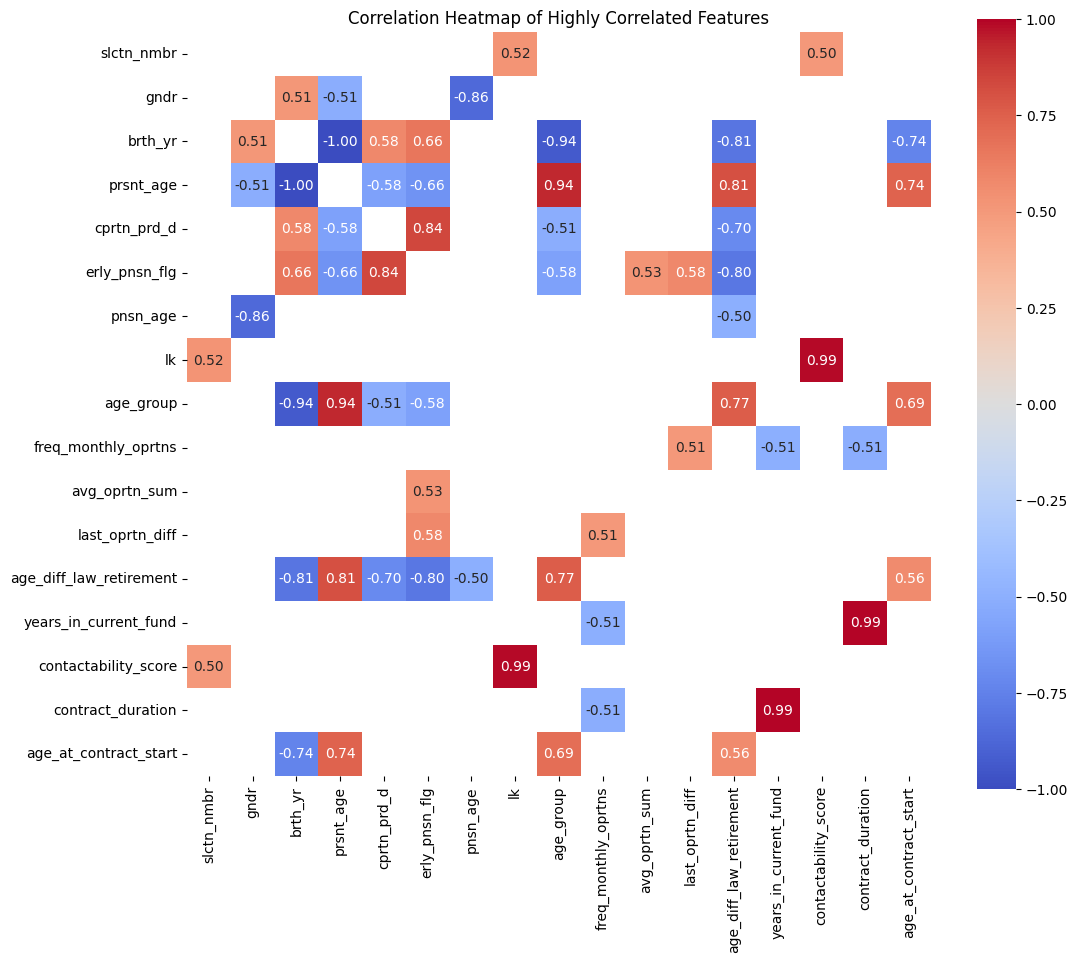

In [50]:
# Выбор числовых столбцов
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Рассчёт корреляционной матрицы
correlation_matrix = numerical_df.corr()

# Установка порога корреляции
threshold = 0.5
high_corr_features = correlation_matrix[(correlation_matrix.abs() >= threshold) & (correlation_matrix != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Настройка размера графика
plt.figure(figsize=(12, 10))

# Построение heatmap для значимых корреляций
sns.heatmap(high_corr_features, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, square=True)

# Заголовок графика
plt.title("Correlation Heatmap of Highly Correlated Features")
plt.show()

In [45]:
df_2.head()

,accnt_id,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day
0,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,2096.31,2012-02-12,2012,2,12
1,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-02-13,2012,2,13
2,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-05-15,2012,5,15
3,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-08-14,2012,8,14
4,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-11-13,2012,11,13


In [46]:
transactions_dummies = pd.get_dummies(df_2, columns=['mvmnt_type', 'sum_type', 'cmmnt'])
transactions_dummies

,accnt_id,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day,mvmnt_type_0.0,mvmnt_type_1.0,sum_type_Взносы работодателя (ДСВ2),sum_type_Взносы софинансирование,sum_type_Выплатной резерв НЧ,sum_type_Выплатной резерв СВ,sum_type_Доп. страховые взносы (ДСВ1),sum_type_ИД Выплатной резерв НЧ,sum_type_ИД Выплатной резерв СВ,sum_type_ИД на взносы работодателя (ИД ДСВ2),sum_type_ИД на доп. взносы (ИД ДСВ1),sum_type_ИД на материнский капитал,sum_type_ИД на софинансирование,sum_type_ИД на страховые взносы на НЧ,sum_type_Материнский капитал,sum_type_РФОПС,sum_type_Страховые взносы на НЧ,cmmnt_Возврат выплаченных сумм (ОПС),cmmnt_Восполнение (ОПС),cmmnt_Закрытие договора ОПС,cmmnt_Компенсация(ОПС),cmmnt_Корректировка записей регистров (ОПС),cmmnt_Назначение пенсии (ОПС),cmmnt_Начисление (ОПС),cmmnt_Начисление пенсии (ОПС),cmmnt_Перевод в резерв Фонда (ОПС),cmmnt_Перевод между счетами ОПС,cmmnt_Передача СПН в другой фонд по Уведомлениям ПФР о разделении ИЛС (ОПС),cmmnt_Поступление взносов ОПС,cmmnt_Приостановление/возобновление/прекращение выплат пенсии (ОПС),cmmnt_Распределение ИД ОПС,cmmnt_Решение о единовременной выплате (ОПС)
0,0x00003A37F46E104EB1AB513510DC1C79,2096.31,2012-02-12,2012,2,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012-02-13,2012,2,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012-05-15,2012,5,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012-08-14,2012,8,14,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012-11-13,2012,11,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225900,0xFFFFFFE66794394B864E0C6A6460E061,0.00,2020-11-16,2020,11,16,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
27225901,0xFFFFFFE66794394B864E0C6A6460E061,223.59,2020-11-16,2020,11,16,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
27225902,0xFFFFFFE66794394B864E0C6A6460E061,72.09,2022-01-31,2022,1,31,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
27225903,0xFFFFFFE66794394B864E0C6A6460E061,188.01,2023-01-06,2023,1,6,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
transactions_dummies = transactions_dummies.replace({True: 1, False: 0})
transactions_dummies.head()

In [ ]:
#for col in transactions_dummies.columns:
#   if col not in ['accnt_id', 'sum']:
#        first_values = transactions_dummies.groupby('accnt_id')[col].first().reset_index()
#        profile_by_account = profile_by_account.merge(first_values, on='accnt_id', how='left')

#profile_by_account

total_sum_by_account = transactions_dummies.groupby('accnt_id', as_index=False)['sum'].sum()
total_sum_by_account.rename(columns={'sum': 'total_transaction_sum'}, inplace=True)

transactions_with_total = transactions_dummies.merge(total_sum_by_account, on='accnt_id', how='left')

transactions_with_total.head()

In [ ]:
transactions_with_total_n = transactions_with_total[transactions_with_total['sum'] != 0]

In [ ]:
transactions_with_total_n.head()

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=transactions_with_total_n['sum'])

plt.title('выбросы суммы')
plt.xlabel('столбец')

plt.show()

In [ ]:
df_2.info()

In [ ]:
df_2.describe()

In [ ]:
df_2.isna().sum(), df_2.isnull().sum(), df_2.duplicated().sum()

In [ ]:
numeric_columns = list(df_2.describe().columns)

fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 4 * len(numeric_columns)), dpi=300)

for ind, col in enumerate(numeric_columns):
    
    plt.subplot(len(numeric_columns), 2, 2 * ind + 1)
    sns.histplot(df_2, x = col, bins = 40, kde = True);
    plt.gca().set_title(col)
        
    plt.subplot(len(numeric_columns), 2, 2 * ind + 2)
    sns.boxplot(df_2, x = col, orient="h", palette="flare")
    plt.gca().set_title(col)
    
fig.tight_layout()
plt.show()

In [ ]:
max(transactions_with_total[transactions_with_total["sum_type_Страховые взносы на НЧ"]==1]["sum"])

In [ ]:
df_2["sum_type"].unique()

In [ ]:
df_2["cmmnt"].unique()

In [ ]:
df_2["mvmnt_type"].value_counts()